## IMPORTING LIBRARIRES:

In [1]:
import pandas as pd
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
! pip install seaborn
import seaborn as sns
import cv2

## DATA LOADING:

In [2]:
data_dir=r"D:\SEM-8\CODE\data"
acci=[]
for file in os.listdir(data_dir):
    acci+=[file]
print(acci)
print(len(acci))

['Accident', 'No Accident']
2


In [3]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
sensitivity=tf.keras.metrics.SensitivityAtSpecificity(0.1)
specificity=tf.keras.metrics.SpecificityAtSensitivity(0.1)

In [4]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## PREPROCESSING:

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import rgb_to_grayscale

# Define your image dimensions and batch size
img_height = 100  # Replace with your desired image height
img_width = 100   # Replace with your desired image width
batch_size = 32   # Replace with your desired batch size

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    preprocessing_function=lambda x: rgb_to_grayscale(x)
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 421 images belonging to 2 classes.
Found 105 images belonging to 2 classes.


## APPLYING CNN ALGORITHM:

In [6]:
from tensorflow.keras.regularizers import l2

In [7]:
num_classes=2

In [8]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))


model.add(Dense(num_classes,kernel_regularizer=l2(0.01),activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               5

## MODEL TRAINING:

In [30]:

model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])
hist = model.fit(train_generator,epochs=15,validation_data=test_generator)
model.save('visualizations/SVM model.h5')


Epoch 1/15
15/15 [==============================] - 7s 380ms/step - loss: 0.5004 - accuracy: 0.4276 - val_loss: 0.4837 - val_accuracy: 0.9009
Epoch 2/15
15/15 [==============================] - 5s 320ms/step - loss: 0.4875 - accuracy: 0.3964 - val_loss: 0.4779 - val_accuracy: 0.6847
Epoch 3/15
15/15 [==============================] - 5s 325ms/step - loss: 0.4821 - accuracy: 0.5367 - val_loss: 0.4728 - val_accuracy: 0.5405
Epoch 4/15
15/15 [==============================] - 5s 341ms/step - loss: 0.4776 - accuracy: 0.4031 - val_loss: 0.4685 - val_accuracy: 0.1081
Epoch 5/15
15/15 [==============================] - 4s 295ms/step - loss: 0.4735 - accuracy: 0.2606 - val_loss: 0.4649 - val_accuracy: 0.1351
Epoch 6/15
15/15 [==============================] - 4s 284ms/step - loss: 0.4700 - accuracy: 0.3029 - val_loss: 0.4618 - val_accuracy: 0.2342
Epoch 7/15
15/15 [==============================] - 4s 274ms/step - loss: 0.4672 - accuracy: 0.2806 - val_loss: 0.4592 - val_accuracy: 0.2252
Epoch 

In [31]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Precision
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# Recall (Sensitivity)
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    specificity = true_negatives / (possible_negatives + K.epsilon())
    return specificity


In [32]:
# Compile the model with defined metrics
model.compile(optimizer="adam", 
               loss="categorical_crossentropy", 
               metrics=['accuracy', precision, recall, specificity])

# Make predictions on the test dataset
y_pred = model.predict(test_generator)  # Get the raw predictions


4/4 [==============================] - 4s 883ms/step


In [33]:
y_true = test_generator.classes  # Ground truth labels from test generator


In [34]:
from sklearn.metrics import classification_report
import numpy as np

# Convert raw predictions to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Generate the classification report
report = classification_report(y_true, y_pred_classes)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.10      1.00      0.18        11
           1       0.00      0.00      0.00       100

    accuracy                           0.10       111
   macro avg       0.05      0.50      0.09       111
weighted avg       0.01      0.10      0.02       111



d:\sem-6\Engineering Project\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\sem-6\Engineering Project\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\sem-6\Engineering Project\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## GRAPH:

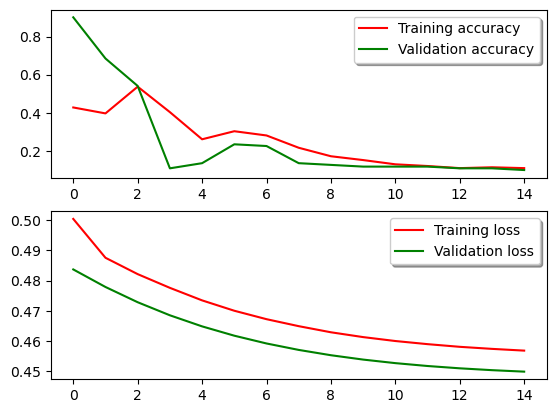

In [35]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='r', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='g',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='r', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='g',label="Validation loss")
legend = ax[1].legend(loc='best', shadow=True)

In [40]:
evaluation_results = model.evaluate(test_generator)

# Print the evaluation results line by line
print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])
print("Precision:", evaluation_results[2])
print("Recall:", evaluation_results[3])
print("Sensitivity at Specificity:", evaluation_results[4])
print("Specificity at Sensitivity:", evaluation_results[5])

ValueError: in user code:

    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\training.py", line 1790, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [36]:
model.evaluate(test_generator)
model.save("SVM.h5")

ValueError: in user code:

    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\training.py", line 1790, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "d:\sem-6\Engineering Project\anaconda\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [37]:
filenames = test_generator.filenames
nb_samples = len(filenames)
model_predict = model.predict_generator(test_generator,steps = nb_samples, verbose=2)

C:\Users\Dr.G.NITHIN-ESWAR\AppData\Local\Temp\ipykernel_4072\281958920.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  model_predict = model.predict_generator(test_generator,steps = nb_samples, verbose=2)


111/111 - 3s - 3s/epoch - 23ms/step


Confusion matrix, without normalization
[[ 11   0]
 [100   0]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

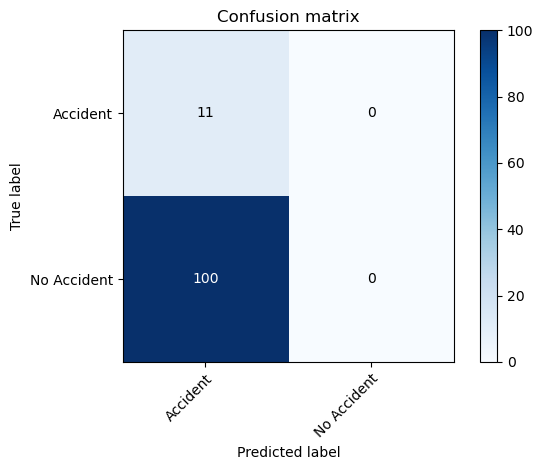

In [38]:
y_true = test_generator.classes
y_pred = model_predict.argmax(axis=1)
plot_confusion_matrix(y_true, y_pred, classes=['Accident', 'No Accident'],
                      title='Confusion matrix')